In [1]:

import os, shutil, sys
import tensorflow.keras
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import optimizers
from tensorflow.keras import regularizers
from tensorflow.keras import initializers
from tensorflow.keras import callbacks
from tensorflow.keras import backend as K
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import array_to_img
from tensorflow.keras.applications.inception_v3 import preprocess_input

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pydicom
from PIL import Image
import cv2
import shutil
from skimage import exposure
from skimage.transform import rotate
from skimage.feature import local_binary_pattern

import skimage 
import PIL

In [2]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [3]:
#get working directory
os.getcwd()

'C:\\Users\\Mojtaba Jafari Tadi\\Projects_AMK\\Radiology Project\\fatpad'

In [4]:
os.listdir()

['.git',
 '.gitignore',
 '.ipynb_checkpoints',
 'brucechou1983_CheXNet_Keras_0.3.0_weights.h5',
 'CNN_automated_medical_diagnostics_five_layers_chopped_two_classes_trained_on_twenty_epochs_Adam_0.0001.ipynb',
 'CNN_FATPAD_MultiHeadAttention.ipynb',
 'CNN_FATPAD_ResidualAttention.ipynb',
 'CNN_FATPAD_SimplePlainNN.ipynb',
 'CNN_FATPAD_TransferLearning-DenseNet.ipynb',
 'CNN_FATPAD_TransferLearning-EfficientNet.ipynb',
 'CNN_FATPAD_TransferLearning-Inception.ipynb',
 'CNN_FATPAD_TransferLearning-MobileNetSE.ipynb',
 'CNN_FATPAD_TransferLearning-NASNet.ipynb',
 'CNN_FATPAD_TransferLearning-ResNet.ipynb',
 'CNN_FATPAD_TransferLearning-Xception.ipynb',
 'CNN_FATPAD_TransferLearning.ipynb',
 'Labels_FatPadDetection.xlsx',
 'Prepare_Xray_Data-CLAHE.ipynb',
 'Prepare_Xray_Data.ipynb',
 'Prepare_Xray_Data_Clahe_HistEq_Inv.ipynb',
 'README.md',
 'ResidualAttentionNetwork.py',
 'x-ray-images-enhancement',
 'xlearn',
 '__pycache__']

In [5]:
#change working directory to where the datasets are
root_directory=os.chdir('C:/Users/Mojtaba Jafari Tadi/Projects_AMK/Radiology Project')

In [6]:
#Provide train, validation, and test ONLY EFFUSION DATASET
#base_dir_train = 'C:/Users/Mojtaba Jafari Tadi/Projects_AMK/Radiology Project/Binary_Classification_Split/train'
#base_dir_validate = 'C:/Users/Mojtaba Jafari Tadi/Projects_AMK/Radiology Project/Binary_Classification_Split/validation'
#base_dir_test = 'C:/Users/Mojtaba Jafari Tadi/Projects_AMK/Radiology Project/Binary_Classification_Split/test'

#print(base_dir_train)

In [44]:
#Provide train, validation, and test EFFUSION + FRACTURE on LATERAL SIDE
base_dir_train = 'C:/Users/Mojtaba Jafari Tadi/Projects_AMK/Radiology Project/Binary_Classification_claheLBP/train'
base_dir_validate = 'C:/Users/Mojtaba Jafari Tadi/Projects_AMK/Radiology Project/Binary_Classification_claheLBP/validation'
base_dir_test = 'C:/Users/Mojtaba Jafari Tadi/Projects_AMK/Radiology Project/Binary_Classification_claheLBP/test'

print(base_dir_train)

C:/Users/Mojtaba Jafari Tadi/Projects_AMK/Radiology Project/Binary_Classification_claheLBP/train


In [55]:
#run tensorflow-keras ImageDataGenerator on the directory which contains train, validate and test
#train_datagen = ImageDataGenerator(
 #   rescale=1./255, # new parameter (maps pixel values to floats)
 #   rotation_range=40,
 #   width_shift_range=0.2,
  ##  height_shift_range=0.2,
  #  shear_range=0.2,
  #  zoom_range=0.25,
  #  horizontal_flip=True,
  #  fill_mode='nearest') # Note: I added this, too

#def gray_to_rgb(img):
 #   return np.repeat(img, 3, 2)

IMAGE_WIDTH=256
IMAGE_HEIGHT=256
IMAGE_SIZE=(IMAGE_WIDTH, IMAGE_HEIGHT)
IMAGE_CHANNELS=1
IMAGE_SHAPE=(IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS)
batch_size=32
epochs = 500
num_classes = 2
def preprocessor(image):
    clahe = cv2.createCLAHE(clipLimit = 5) 
    final_img = clahe.apply(image_bw) + 30
    

    
def preprocessing_image(image):
    image = np.array(image)
    image=(image - np.mean(image)) / np.std(image)
    img=cv2.bitwise_not(image)
    #image_norm=exposure.equalize_adapthist(img)
    return img

    
train_datagen = ImageDataGenerator(rescale=1./255,samplewise_center=True, 
              samplewise_std_normalization=True, 
              horizontal_flip = True, 
              vertical_flip = False, 
              height_shift_range= 0.05, 
              width_shift_range=0.05, 
              rotation_range=35, 
              shear_range = 0.21,
              fill_mode = 'nearest',
              zoom_range=0.25,preprocessing_function=preprocess_input)


test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        base_dir_train,
       shuffle=True,
    target_size=IMAGE_SIZE,
    class_mode='categorical',
    #color_mode='rgb',
    batch_size=batch_size)

validation_generator = test_datagen.flow_from_directory(
        base_dir_validate, 
       target_size=IMAGE_SIZE,
    batch_size=batch_size,
    class_mode="categorical",
    #color_mode='rgb',
    shuffle=True)

test_generator = train_datagen.flow_from_directory(
        base_dir_test,
        target_size=IMAGE_SIZE,
        batch_size=batch_size,
        class_mode="categorical",
       # color_mode='rgb',
        shuffle=False)



Found 3094 images belonging to 2 classes.
Found 884 images belonging to 2 classes.
Found 443 images belonging to 2 classes.


In [56]:
import matplotlib.pyplot as plt


def plot_hist(hist):
    plt.plot(hist.history["accuracy"])
    plt.plot(hist.history["val_accuracy"])
    plt.title("model accuracy")
    plt.ylabel("accuracy")
    plt.xlabel("epoch")
    plt.legend(["train", "validation"], loc="upper left")
    plt.show()

def plot_history(h):
    acc = h.history['acc']
    val_acc = h.history['val_acc']
    loss = h.history['loss']
    val_loss = h.history['val_loss']

    epochs = range(len(acc))

    plt.plot(epochs, acc, 'bo', label='Training acc')
    plt.plot(epochs, val_acc, 'b', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()

    plt.figure()

    plt.plot(epochs, loss, 'bo', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

    plt.show()
    
def summarize_diagnostics(history):
    # plot loss
    plt.subplot(411)
    plt.title('Cross Entropy Loss')
    plt.plot(history.history['loss'], color='blue', label='train')
    plt.plot(history.history['val_loss'], color='orange', label='validation')
    # plot accuracy
    plt.subplot(412)
    plt.title('Classification Accuracy')
    plt.plot(history.history['binary_accuracy'], color='blue', label='train')
    plt.plot(history.history['val_binary_accuracy'], color='orange', label='validation')
    
    plt.subplot(413)
    plt.title('Classification Precision')
    plt.plot(history.history['precision'], color='blue', label='train')
    plt.plot(history.history['val_precision'], color='orange', label='validation')
    
    plt.subplot(414)
    plt.title('Classification Recall')
    plt.plot(history.history['recall'], color='blue', label='train')
    plt.plot(history.history['val_recall'], color='orange', label='validation')
    # save plot to file
    plt.show()
    filename = sys.argv[0].split('/')[-1]
    plt.savefig(filename + '_plot.png')
    #plt.close()


In [57]:
train_generator.image_shape


(256, 256, 3)

In [58]:
from matplotlib import pyplot
gr=0
if gr: 
    fig, axs = plt.subplots(4,4, figsize=(15, 15), facecolor='w', edgecolor='k')
    axs = axs.ravel()
    for i in range(16):
        # define subplot
        # generate batch of images
        batch = train_generator.next()
        # convert to unsigned integers for viewing
        image = batch[0]
        # plot raw pixel data
        axs[i].imshow(image[i].reshape(200,200), cmap=pyplot.get_cmap('gray'))# show the figure

In [59]:
METRICS = [
    tensorflow.keras.metrics.BinaryAccuracy(),
    tensorflow.keras.metrics.Precision(name="precision"),
    tensorflow.keras.metrics.Recall(name="recall"),
]


In [60]:
initial_learning_rate = 0.00015
lr_schedule = tensorflow.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate, decay_steps=100000, decay_rate=0.96, staircase=True
)

In [142]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential, Model
from keras.layers import Dropout, Flatten, Dense, Activation, AveragePooling2D, GlobalAveragePooling2D
assert tf.__version__ >= "2.0"
from tensorflow.keras.applications import InceptionResNetV2,VGG19,MobileNet,ResNet50,NASNetMobile,EfficientNetB0

#from keras.applications import MobileNet

#base_model = keras.applications.InceptionV3(input_tensor=inputs,weights="imagenet",  include_top=False)
base_model_1 = keras.applications.MobileNet(input_tensor=inputs,weights="imagenet", include_top=False)
base_model_2 = keras.applications.VGG19(input_tensor=inputs,weights="imagenet", include_top=False)

inputs = layers.Input(shape=train_generator.image_shape)

#base_model_1 = tensorflow.keras.Model(inputs=base_model_1.input, outputs=base_model_1.layers[-1].output)
#base_model_2 = tensorflow.keras.Model(inputs=base_model_2.input, outputs=base_model_2.layers[-1].output)

combined_features=tensorflow.keras.layers.Concatenate()([base_model_1(inputs), base_model_2(inputs)])

model = models.Sequential()
model.add(combined_features)
model.add(layers.BatchNormalization())
#model.add(layers.GlobalMaxPooling2D())
#model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation="relu"))
model.add(layers.Dense(512, activation="relu"))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(256, activation="relu"))
model.add(layers.Dropout(0.5))

model.add(layers.Dense(2, activation="softmax", name="pred2"))


#SE=squeeze_excite_block(base_model.output)
#avg = keras.layers.GlobalAveragePooling2D()(SE)
#output = keras.layers.Dense(2, activation="softmax")(avg)
#model = keras.models.Model(inputs=base_model.input, outputs=output)

for layer in base_model_1.layers:
    layer.trainable = False
for layer in base_model_2.layers:
    layer.trainable = False
#optimizer = keras.optimizers.RMSprop(lr=0.001)
optimizer = keras.optimizers.Adam(learning_rate=1e-4)

model.compile(loss="categorical_crossentropy", optimizer=optimizer, metrics=METRICS)
model.summary()


TypeError: The added layer must be an instance of class Layer. Found: KerasTensor(type_spec=TensorSpec(shape=(None, 8, 8, 1536), dtype=tf.float32, name=None), name='concatenate_44/concat:0', description="created by layer 'concatenate_44'")

In [97]:
checkpoint_cb = tensorflow.keras.callbacks.ModelCheckpoint("xray_model_110321_effv0.h5",mode='min', save_best_only=True)

early_stopping_cb = tensorflow.keras.callbacks.EarlyStopping(patience=50, restore_best_weights=True)

In [98]:
STEP_SIZE_TRAIN=train_generator.n//train_generator.batch_size
STEP_SIZE_VALID=validation_generator.n//validation_generator.batch_size

In [99]:
batch_size=32
hist = model.fit(train_generator,
      epochs=500,
    steps_per_epoch=STEP_SIZE_TRAIN,
      validation_data=validation_generator,
     validation_steps=STEP_SIZE_VALID,
      verbose=1,callbacks=[checkpoint_cb])




RuntimeError: You must compile your model before training/testing. Use `model.compile(optimizer, loss)`.

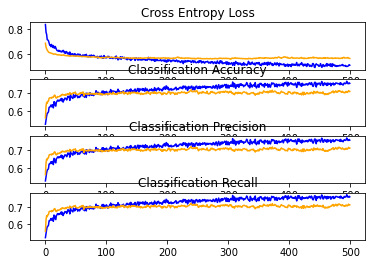

<Figure size 432x288 with 0 Axes>

In [21]:
#plot_hist(hist)
summarize_diagnostics(hist)

In [22]:
test_loss, test_acc, precision,recall = model.evaluate(test_generator, steps=int( test_generator.n / batch_size))
test_acc

27/27 [==============================] - 5s 173ms/step - loss: 0.5796 - binary_accuracy: 0.7130 - precision: 0.7130 - recall: 0.7130


0.7129629850387573

In [23]:
from sklearn.metrics import classification_report, confusion_matrix
from keras import metrics
Y_pred = model.predict(test_generator, verbose=1)
y_pred = np.argmax(Y_pred, axis=1)
print(y_pred)
class_labels = list(test_generator.class_indices.keys())   
print(class_labels)
true_classes = test_generator.classes

report = classification_report(true_classes, y_pred, target_names=class_labels)
print(report) 

28/28 [==============================] - 5s 170ms/step
[0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 1 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 1 0
 0 1 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 1 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 1
 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 1 0
 0 1 0 0 1 0 0 0 0 0 0 1 1 1 1 1 1 0 1 1 1 1 0 0 0 1 0 1 0 1 1 1 1 0 1 1 1
 0 1 1 1 1 1 1 0 1 0 1 0 0 1 0 1 1 0 1 0 1 1 1 0 0 0 0 0 1 1 1 1 1 1 1 0 0
 0 0 1 1 1 0 0 0 0 0 1 1 1 1 0 1 0 0 0 1 0 1 1 1 1 0 0 0 1 0 0 0 0 0 1 1 0
 0 1 1 0 1 0 0 0 0 0 0 1 0 1 1 0 0 1 0 0 0 1 0 0 0 1 1 1 0 1 0 1 1 1 1 0 1
 1 1 1 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 0 0]
['EFFR_cl0', 'EFFR_cl1']
              precisi

In [24]:
print('Confusion Matrix')
print(confusion_matrix(test_generator.classes, y_pred))
print('Classification Report')
target_names = ['Normal', 'Abnormal']
print(classification_report(test_generator.classes, y_pred, target_names=target_names))

Confusion Matrix
[[217  37]
 [ 86 103]]
Classification Report
              precision    recall  f1-score   support

      Normal       0.72      0.85      0.78       254
    Abnormal       0.74      0.54      0.63       189

    accuracy                           0.72       443
   macro avg       0.73      0.70      0.70       443
weighted avg       0.72      0.72      0.71       443



In [25]:
keras.metrics.binary_accuracy(test_generator.classes, y_pred)

<tf.Tensor: shape=(), dtype=float32, numpy=0.7223476>

In [28]:
Y_pred

array([[0.7697063 , 0.23029368],
       [0.76228994, 0.2377101 ],
       [0.66809213, 0.3319079 ],
       [0.76333004, 0.23666991],
       [0.49390683, 0.50609314],
       [0.7376383 , 0.26236168],
       [0.54871213, 0.45128787],
       [0.47968605, 0.520314  ],
       [0.6192423 , 0.3807577 ],
       [0.7119839 , 0.28801608],
       [0.5430277 , 0.45697233],
       [0.30241945, 0.6975805 ],
       [0.7975736 , 0.20242637],
       [0.57464314, 0.4253569 ],
       [0.7594967 , 0.24050337],
       [0.38121045, 0.61878955],
       [0.8172303 , 0.1827697 ],
       [0.8468022 , 0.1531978 ],
       [0.8480573 , 0.15194267],
       [0.9195157 , 0.08048428],
       [0.60313565, 0.39686435],
       [0.9180176 , 0.08198243],
       [0.8079483 , 0.19205166],
       [0.81333303, 0.1866669 ],
       [0.5228842 , 0.4771158 ],
       [0.9224072 , 0.07759279],
       [0.7726445 , 0.2273554 ],
       [0.792593  , 0.20740697],
       [0.61417717, 0.38582283],
       [0.8905642 , 0.10943583],
       [0.

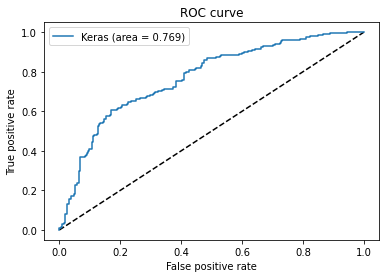

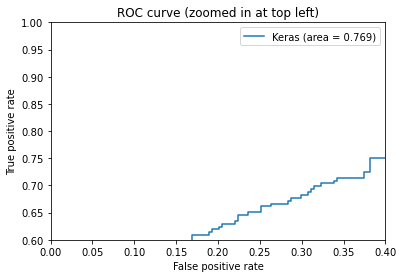

In [33]:
from sklearn.metrics import auc
from sklearn.metrics import roc_curve

fpr_keras, tpr_keras, thresholds_keras = roc_curve(test_generator.classes, Y_pred[:,1])

auc_keras = auc(fpr_keras, tpr_keras)

plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()
# Zoom in view of the upper left corner.
plt.figure(2)
plt.xlim(0, 0.4)
plt.ylim(0.6, 1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve (zoomed in at top left)')
plt.legend(loc='best')
plt.show()
